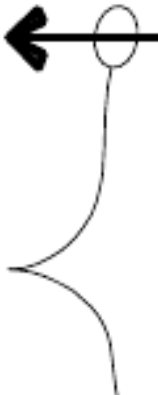

In [1]:
import cv2
from PIL import Image

img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/2-lines-indicator.png")

Image.fromarray(img)

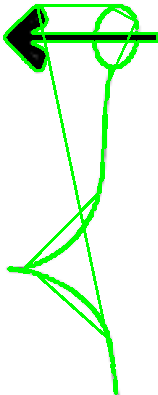

In [2]:
from ocr.line_detector import find_contours
import numpy as np

contours = find_contours(img)
contours = np.vstack(contours).reshape(-1, 2)
cv2.drawContours(img, [contours], 0, (0, 255, 0), 2)

# for i, cnt in enumerate(contours):
#     print(i, cv2.contourArea(cnt))
#     if cv2.contourArea(cnt) > 500:
#         cv2.drawContours(img, [cnt], 0, (0, 255, 0), 2)

Image.fromarray(img)